# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading the data from csv file to a pandas DataFrame 

In [2]:
customer_data = pd.read_csv(r'C:\Users\dc\OneDrive\Desktop\Mall_Customers.csv')

# First 5 row in the DataFrame

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Finding the number of Rows AND Columns

In [4]:
print(customer_data.shape)
print('The Number of Rows :',customer_data.shape[0])
print('The Number of columns :',customer_data.shape[1])

(200, 5)
The Number of Rows : 200
The Number of columns : 5


# Getting some Information about the Dataset

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Checking for missing values

In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Choosing the Annual Income Column AND Spending Score column

In [7]:
X = customer_data.iloc[:,3:5].values

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the number of clusters
    -  WCSS : Within Clusters Sum of Squares

# Finding wcss values for different number of cluster

In [9]:
wcss = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
    Kmeans.fit(X)
    
    
    wcss.append(Kmeans.inertia_)

D:\Users\project\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plot an Eblow Graph

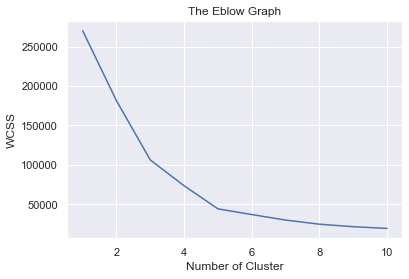

In [10]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Eblow Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

# Optimal Number of Cluster = 5
    - Training the K-Means Clustering Model

In [11]:
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

# Return a label for each data point based on their cluster 

In [12]:
Y = kmeans.predict(X) 
Y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

# Visiualizaing all the clusters
    
    - 5 Cluster : 0 , 1 , 2 , 3 , 4
    - plotting all the clusters AND their Centroids

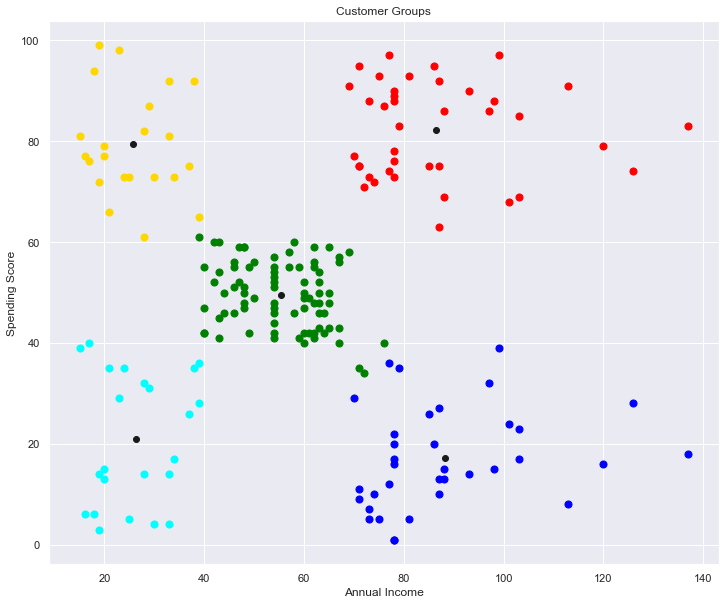

In [13]:
plt.figure(figsize=(12,10))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50 , c='green', label ='Cluster 1' )
plt.scatter(X[Y==1,0],X[Y==1,1], s=50 , c='blue', label ='Cluster 2' )
plt.scatter(X[Y==2,0],X[Y==2,1], s=50 , c='cyan', label ='Cluster 3' )
plt.scatter(X[Y==3,0],X[Y==3,1], s=50 , c='gold', label ='Cluster 4' )
plt.scatter(X[Y==4,0],X[Y==4,1], s=50 , c='red', label ='Cluster 5' )

# Plot the Centriods
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
